In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

TARGET_COL = 'Calories'

data_train.sample(5)

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
121677,121677,female,42,171.0,70.0,16.0,101.0,40.2,91.0
685718,685718,male,21,185.0,87.0,26.0,99.0,40.9,120.0
589689,589689,male,27,174.0,79.0,3.0,78.0,38.7,5.0
124751,124751,male,62,195.0,92.0,11.0,95.0,40.0,66.0
186157,186157,male,63,172.0,83.0,19.0,101.0,40.3,132.0


### from looking at the data tab on kaggle:
* no missing data, at all
* height, weight and heart rate distributions look suspicious - actual effect or artifact?

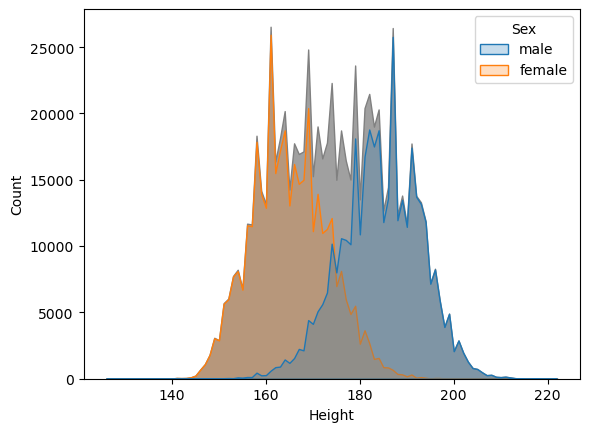

In [2]:
def make_integer_hist_plot(df, col):
    low = df[col].min()
    high = df[col].max()
    bins = np.linspace(low-0.5, high+0.5, round(high-low+2))
    sns.histplot(data=df, x=col, color='gray', bins=bins, element="poly")
    sns.histplot(data=df, x=col, hue='Sex', bins=bins, element="poly")

make_integer_hist_plot(data_train, "Height")

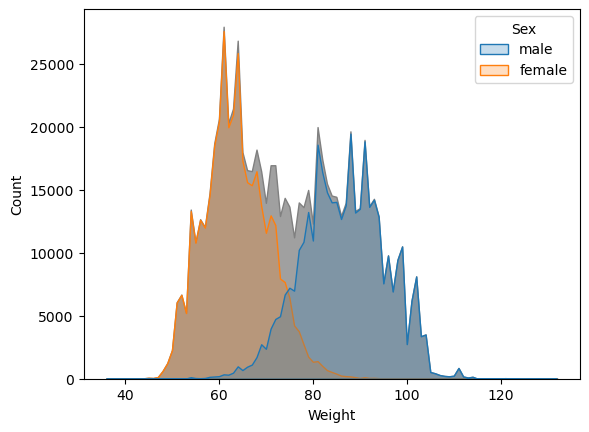

In [3]:
make_integer_hist_plot(data_train, "Weight")

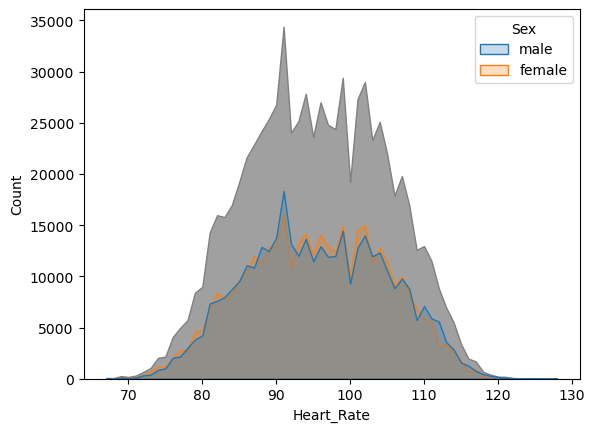

In [4]:
make_integer_hist_plot(data_train, "Heart_Rate")

### correlations with TARGET

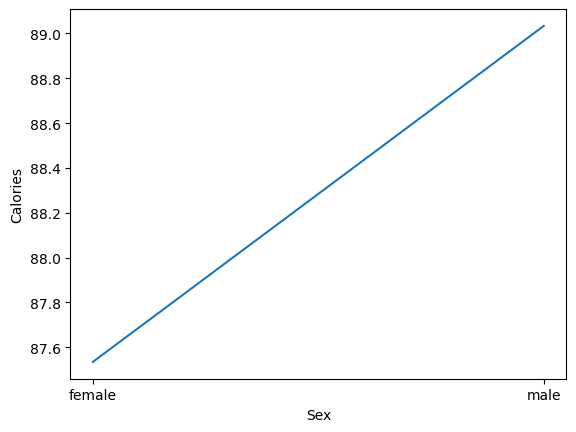

In [5]:
col = 'Sex'
df_mean = data_train[[TARGET_COL, col]].groupby([col]).mean()
df_mean.sort_values(by=TARGET_COL, inplace=True)
lp = sns.lineplot(data=df_mean, x=col, y=TARGET_COL)

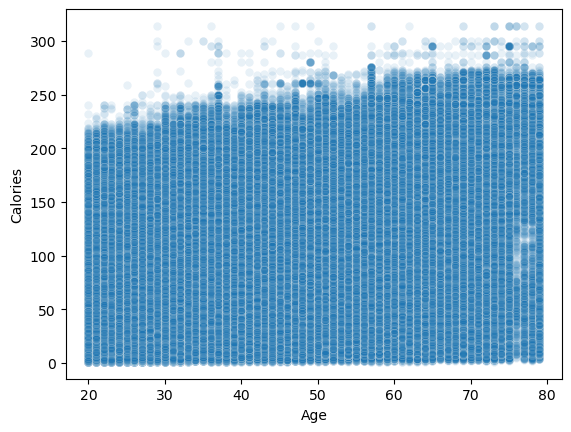

In [6]:
sc = sns.scatterplot(data=data_train, x='Age', y=TARGET_COL, alpha=0.1)

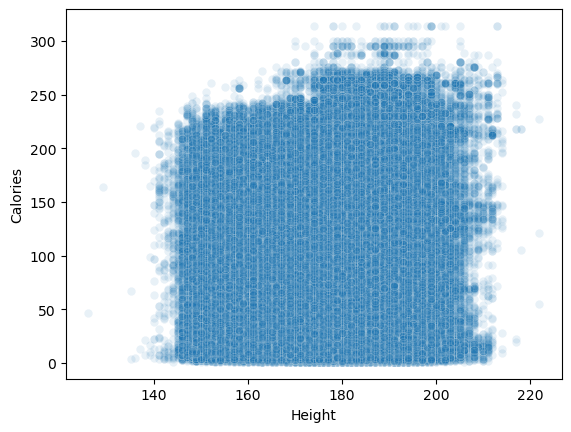

In [7]:
sc = sns.scatterplot(data=data_train, x='Height', y=TARGET_COL, alpha=0.1)

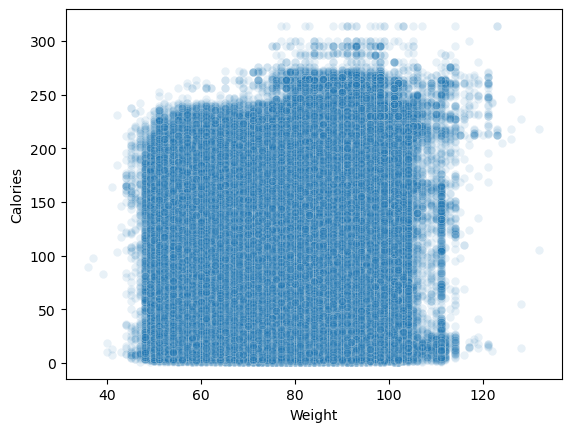

In [8]:
sc = sns.scatterplot(data=data_train, x='Weight', y=TARGET_COL, alpha=0.1)

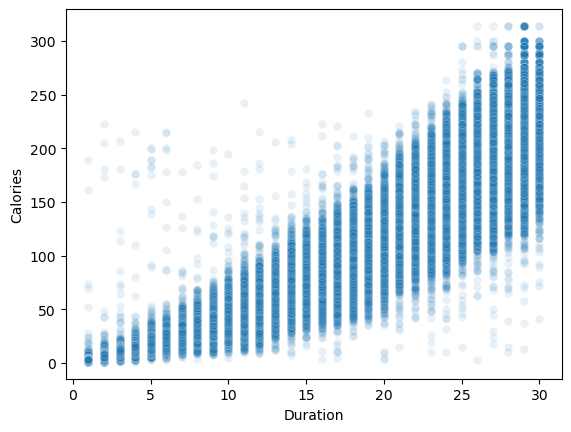

In [9]:
sc = sns.scatterplot(data=data_train, x='Duration', y=TARGET_COL, alpha=0.1)

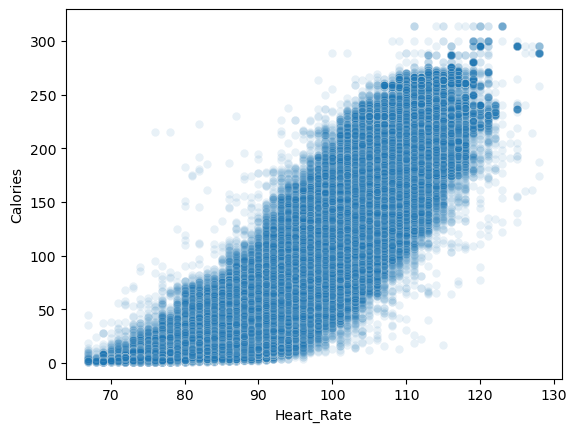

In [10]:
sc = sns.scatterplot(data=data_train, x='Heart_Rate', y=TARGET_COL, alpha=0.1)

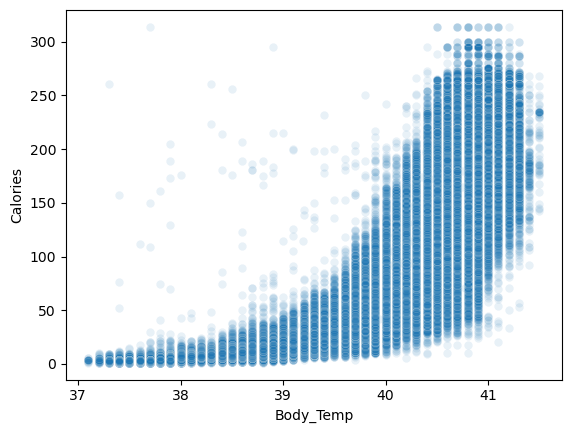

In [11]:
sc = sns.scatterplot(data=data_train, x='Body_Temp', y=TARGET_COL, alpha=0.1)

### correlations between other columns

In [12]:
sc = sns.regplot(data=data_train, x='Height', y='Weight', ci=False, line_kws={'color':'red'})

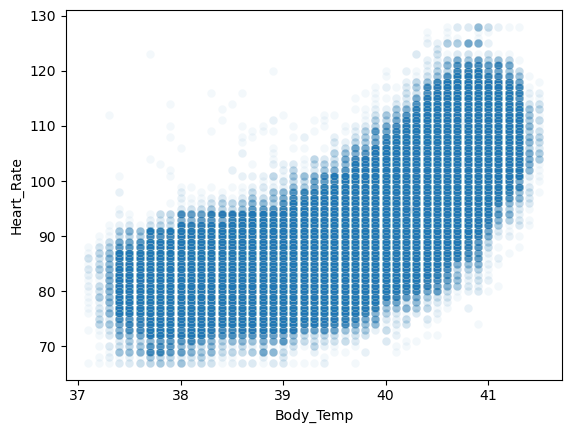

In [13]:
sc = sns.scatterplot(data=data_train, x='Body_Temp', y='Heart_Rate', alpha=0.05)

In [25]:
from sklearn.linear_model import LinearRegression
X = data_train[['Weight']]  # reshape x for sklearn -> 2D array
y = data_train['Height']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

data_train['height_weight_residual'] = (y - y_pred) ** 2

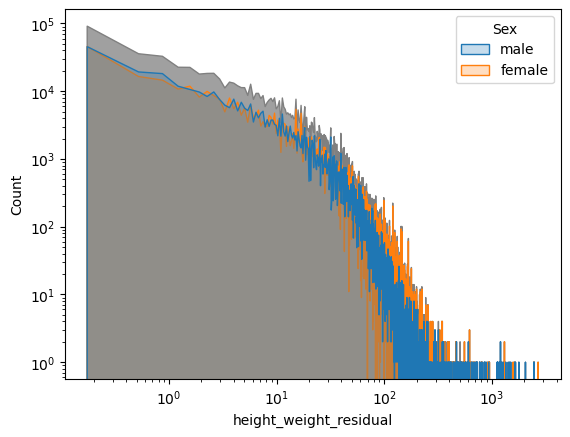

In [29]:
import matplotlib.pyplot as plt
sns.histplot(data=data_train, x='height_weight_residual', color='gray', element="poly")
sns.histplot(data=data_train, x='height_weight_residual', hue='Sex', element="poly")
plt.xscale('log')
plt.yscale('log')

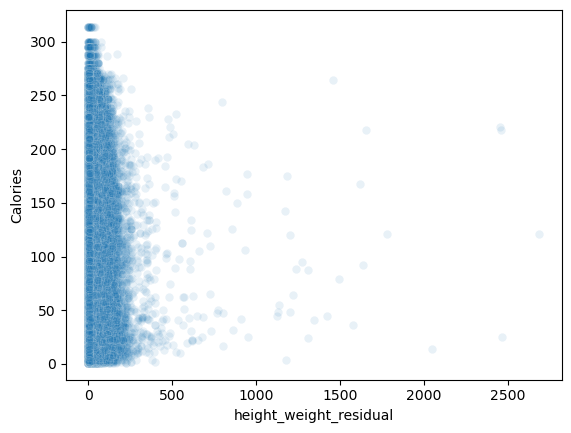

In [30]:
sc = sns.scatterplot(data=data_train, x='height_weight_residual', y=TARGET_COL, alpha=0.1)

/tmp/ipykernel_455640/698231131.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = data_orig.groupby([col]).mean()


,User_ID,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
Age,,,,,,,
37,1.489035e+07,175.381625,75.303887,15.833922,96.042403,40.018021,89.024735
67,1.514402e+07,173.271605,75.413580,15.672840,95.333333,40.051852,102.790123
68,1.517011e+07,173.426667,75.560000,16.286667,95.920000,40.106667,108.093333
34,1.496781e+07,174.592982,74.407018,16.108772,96.080702,40.109123,87.684211
57,1.504649e+07,175.576271,77.209040,15.824859,95.598870,40.032203,99.960452


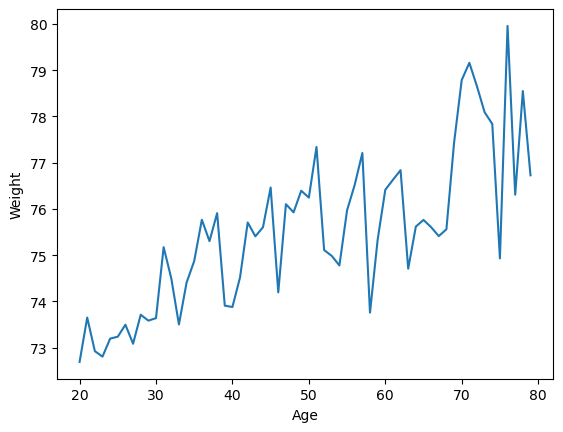

In [4]:
# plots for kaggle discussion:
data_orig = pd.read_csv('calories.csv')

col = 'Age'
df_mean = data_orig.groupby([col]).mean()
#df_mean.sort_values(by=TARGET_COL, inplace=True)
lp = sns.lineplot(data=df_mean, x=col, y='Weight')
df_mean.sample(5)

NameError: name 'plt' is not defined

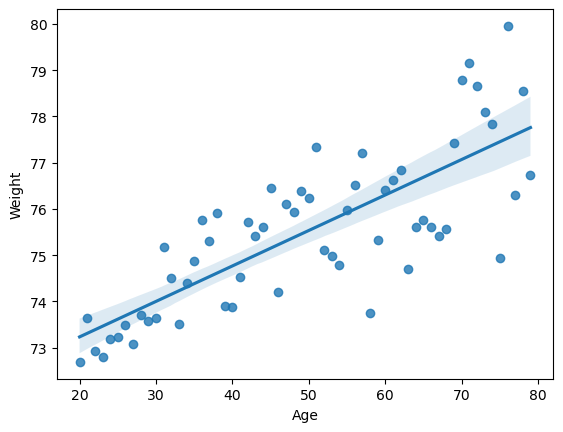

In [19]:
sns.regplot(data=df_mean, x=df_mean.index, y='Weight')
plt.savefig('age_weight.png')

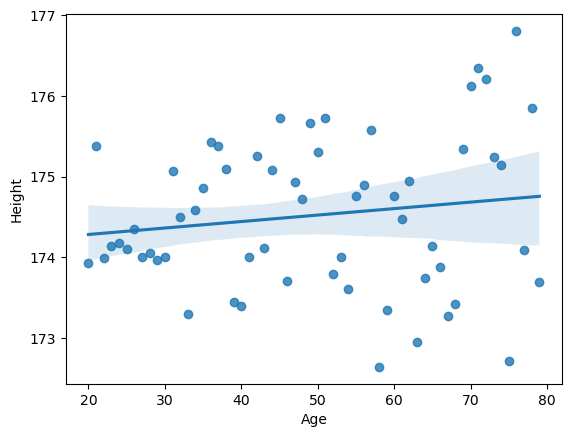

In [8]:
sns.regplot(data=df_mean, x=df_mean.index, y='Height')
plt.savefig('age_height.png')

In [2]:
data_train['BMI'] = data_train['Weight']/(data_train['Height']**2)*10000
data_train['BMI_Group'] = pd.cut(data_train['BMI'], bins=[0, 16.5, 18.5, 25, 30, 35, 40, 100], labels=[0, 1, 2, 3, 4, 5, 6])
data_train.sample(5)

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI,BMI_Group
159265,159265,male,52,192.0,98.0,6.0,84.0,39.4,27.0,26.584201,3
363634,363634,male,26,182.0,89.0,9.0,89.0,39.6,32.0,26.868736,3
661815,661815,male,34,177.0,78.0,26.0,101.0,40.7,142.0,24.897060,2
544927,544927,male,23,187.0,81.0,5.0,81.0,39.3,10.0,23.163373,2
34455,34455,male,40,192.0,93.0,16.0,87.0,40.5,65.0,25.227865,3


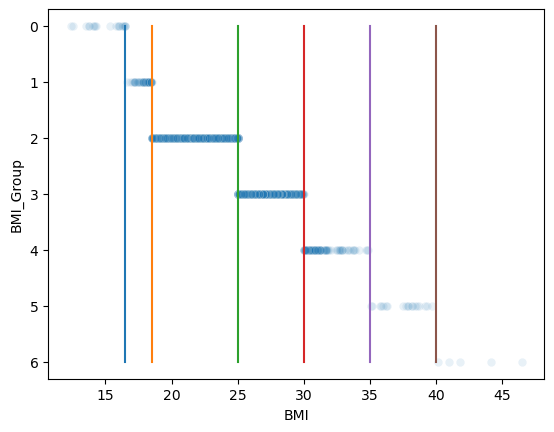

In [3]:
sc = sns.scatterplot(data=data_train, x='BMI', y='BMI_Group', alpha=0.1)
sc.plot([16.5, 16.5], [0, 6])
sc.plot([18.5, 18.5], [0, 6])
sc.plot([25, 25], [0, 6])
sc.plot([30, 30], [0, 6])
sc.plot([35, 35], [0, 6])
sc.plot([40, 40], [0, 6])

<AxesSubplot:xlabel='BMI', ylabel='Count'>

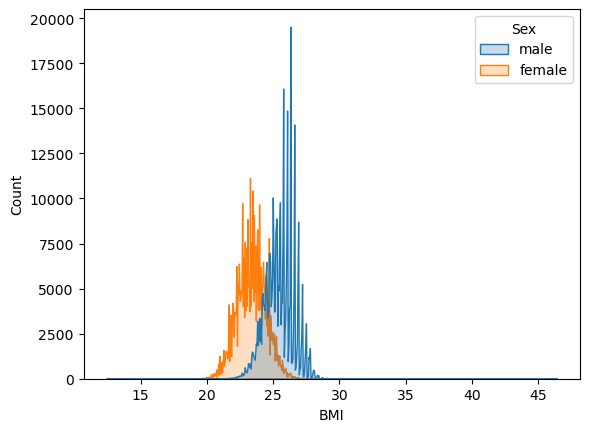

In [4]:
sns.histplot(data=data_train, x='BMI', hue='Sex', element="poly")

In [9]:
BMR_male = 66.47 + data_train['Weight']*13.75 + data_train['Height']*5.003 - data_train['Age']*6.755
BMR_female = 655.1 + data_train['Weight']*9.563 + data_train['Height']*1.85 - data_train['Age']*4.676

data_train['BMR'] = np.where(data_train['Sex']=='male', BMR_male, BMR_female)
data_train.sample(5)

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI,BMI_Group,BMR
376393,376393,female,29,156.0,58.0,22.0,97.0,40.6,111.0,23.833005,2,1362.750
203215,203215,male,37,181.0,89.0,5.0,83.0,39.2,15.0,27.166448,3,1945.828
479054,479054,male,21,191.0,88.0,21.0,101.0,40.7,103.0,24.122146,2,2090.188
149867,149867,female,46,166.0,65.0,24.0,101.0,40.7,141.0,23.588329,2,1368.699
275968,275968,female,46,159.0,62.0,23.0,106.0,40.7,146.0,24.524346,2,1327.060


<AxesSubplot:xlabel='BMR', ylabel='Count'>

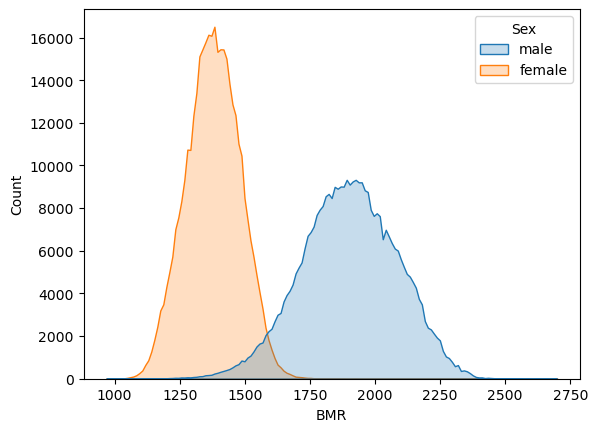

In [10]:
sns.histplot(data=data_train, x='BMR', hue='Sex', element="poly")

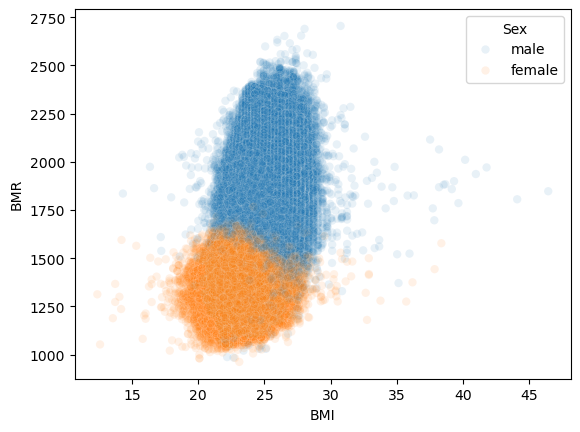

In [12]:
sc = sns.scatterplot(data=data_train, x='BMI', y='BMR', hue='Sex', alpha=0.1)

In [20]:
from scipy.stats import zscore
data_train['BMI_zscore'] = data_train.groupby('Sex')['BMI'].transform(zscore)
data_train.sample(5)

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI,BMI_Group,BMR,BMI_zscore
666011,666011,female,63,146.0,53.0,9.0,84.0,39.9,38.0,24.863952,2,1137.451,1.359852
654363,654363,male,44,176.0,80.0,13.0,92.0,40.3,57.0,25.826446,3,1749.778,0.382857
591449,591449,female,43,174.0,73.0,20.0,103.0,40.6,121.0,24.111507,2,1474.031,0.686070
278841,278841,female,32,161.0,64.0,13.0,95.0,40.0,63.0,24.690405,2,1415.350,1.204448
33688,33688,male,22,182.0,81.0,29.0,104.0,40.9,126.0,24.453568,2,1942.156,-0.874037


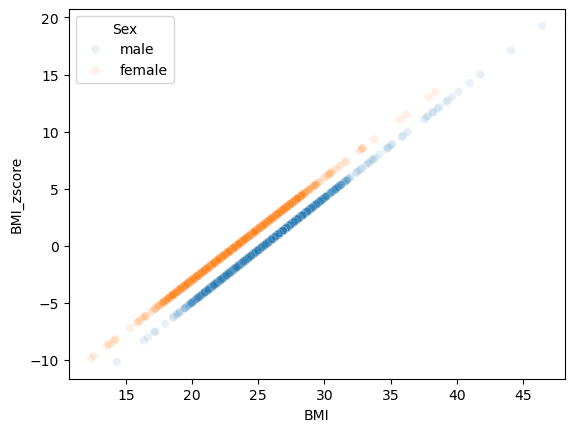

In [21]:
sc = sns.scatterplot(data=data_train, x='BMI', y='BMI_zscore', hue='Sex', alpha=0.1)

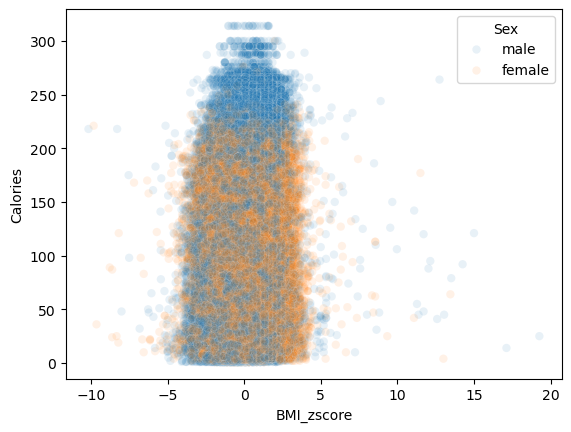

In [22]:
sc = sns.scatterplot(data=data_train, x='BMI_zscore', y='Calories', hue='Sex', alpha=0.1)

/home/richard/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


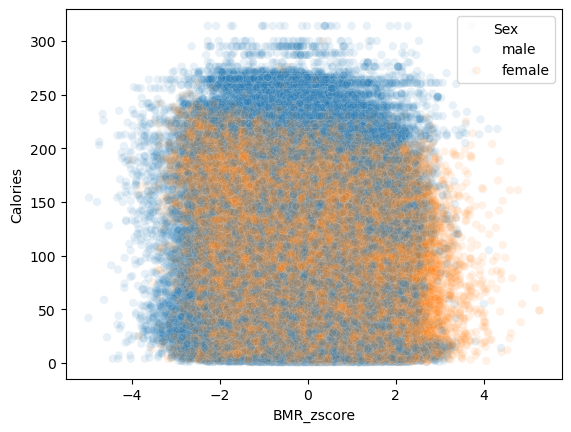

In [24]:
data_train['BMR_zscore'] = data_train.groupby('Sex')['BMR'].transform(zscore)
sc = sns.scatterplot(data=data_train, x='BMR_zscore', y='Calories', hue='Sex', alpha=0.1)

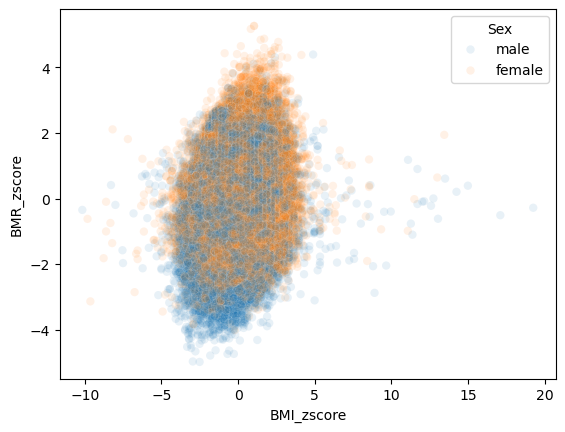

In [25]:
sc = sns.scatterplot(data=data_train, x='BMI_zscore', y='BMR_zscore', hue='Sex', alpha=0.1)

In [5]:
# "official" heart rate zones
data_original = pd.read_csv('calories.csv')

data_train['Heart_Rate_Zone_2'] = pd.cut(data_train['Heart_Rate']/(220-data_train['Age'])*100, bins=[0, 50, 65, 80, 85, 92, 100], labels=[0, 1, 2, 3, 4, 5]).astype(int)
data_original['Heart_Rate_Zone_2'] = pd.cut(data_original['Heart_Rate']/(220-data_original['Age'])*100, bins=[0, 50, 65, 80, 85, 92, 100], labels=[0, 1, 2, 3, 4, 5]).astype(int)

<AxesSubplot:xlabel='Heart_Rate_Zone_2', ylabel='Count'>

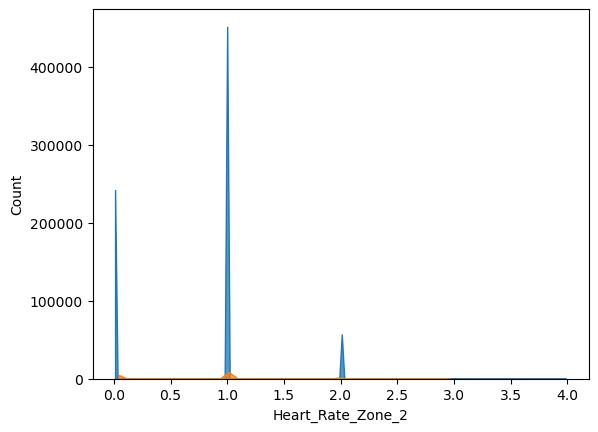

In [7]:
sns.histplot(data=data_train, x='Heart_Rate_Zone_2', element="poly")
sns.histplot(data=data_original, x='Heart_Rate_Zone_2', element="poly")

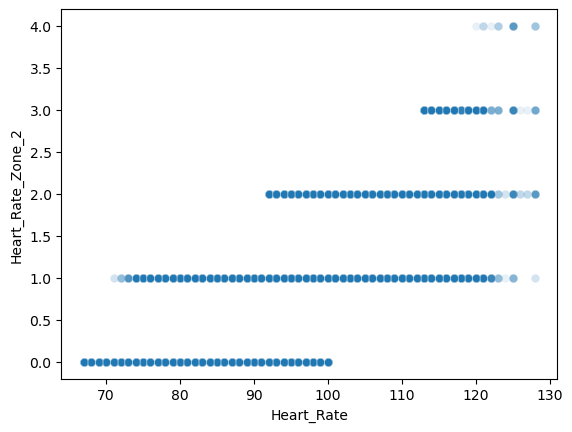

In [8]:
sc = sns.scatterplot(data=data_train, x='Heart_Rate', y='Heart_Rate_Zone_2', alpha=0.1)

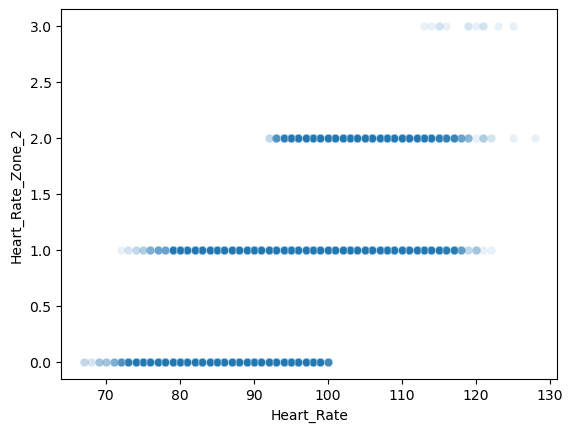

In [9]:
sc = sns.scatterplot(data=data_original, x='Heart_Rate', y='Heart_Rate_Zone_2', alpha=0.1)